## 합성곱 신경망

### 패션 MNIST CNN

- 

In [61]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [62]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [63]:
train_input.shape

(60000, 28, 28)

In [64]:
# 255.0 - 정규화처리
# reshape(-1, 28, 28, 1) - 4차원 배열로 변경
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [65]:
train_scaled.shape

(60000, 28, 28, 1)

In [66]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [67]:
test_scaled.shape

(10000, 28, 28, 1)

- train_scaled에서 1차원을 더 추가한 이유
- channel 값 : 흑백이기 때문에 1채널만 있으면 됨
    - 60000(데이터수), 28(이미지높이), 1(입력채널)

In [68]:
## 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [69]:
print(train_scaled.shape, val_scaled.shape)
print(train_target.shape, val_target.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)
(48000,) (12000,)


### 합성곱 신경망 만들기

In [70]:
model = keras.Sequential(name='CNN1')

# 32 -> 합성곱 층의 필터 갯수
# kernel_size=3 -> (3x3)
# padding='same' -> 패딩 추가해서 특성맵사이즈를 원본과 동일하게

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [71]:
model.add(keras.layers.MaxPooling2D(2)) # 특성맵이 반으로 줄어듬. 14x14 사이즈의 특성맵

In [72]:
model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
# 두번째 합성곱/풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 사이즈 반으로, 7x7x64 특성맵 -> 3136 출력

In [74]:
# 심층신경망을 붙임
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

- 하나의 셀로 합침

In [75]:
model = keras.Sequential(name='CNN1')

# 32 -> 합성곱 층의 필터 갯수
# kernel_size, 3 -> (3x3)
# padding, same -> 패딩 추가해서 특성맵사이즈를 원본과 동일하게
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1), name='First_CNN'))
model.add(keras.layers.MaxPooling2D(2))   # 특성맵이 반으로 줄어듬. 14x14 사이즈의 특성맵

# 두번째 합성곱/풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', name='Secound_CNN'))
model.add(keras.layers.MaxPooling2D(2))  # 사이즈 반으로, 7x7x64 특성맵 -> 3136 출력

# 심층신경망을 붙임
model.add(keras.layers.Flatten(name='Flatten'))
model.add(keras.layers.Dense(100, activation='relu', name='Hidden'))
model.add(keras.layers.Dropout(0.4, name='Dropout'))  
model.add(keras.layers.Dense(10, activation='softmax', name='Output'))

model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_CNN (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 Secound_CNN (Conv2D)        (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 Flatten (Flatten)           (None, 3136)              0         
                                                                 
 Hidden (Dense)              (None, 100)               313700 

- graphviz설치
- pydot 파이썬 모듈 설치
- VS Code 재시작

In [76]:
!pip install pydot


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
# 모델 시각화(안됨)
from keras.utils import plot_model
import traceback

try:
    plot_model(model, show_shapes=True)
except Exception as e:
    print("모델 시각화 실패:")
    traceback.print_exc()

모델 시각화 실패:


Traceback (most recent call last):
  File "c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\pydot\core.py", line 1851, in create
    stdout_data, stderr_data, process = call_graphviz(
                                        ^^^^^^^^^^^^^^
  File "c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\pydot\core.py", line 211, in call_graphviz
    process = subprocess.Popen(
              ^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\.pyenv\pyenv-win\versions\3.11.9\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Admin\.pyenv\pyenv-win\versions\3.11.9\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Source\iot-dataanaly

In [ ]:
# ## 상세 모델 시각화
# keras.utils.plot_model(model, show_shapes=True)

#### 모델 컴파일, 훈련

In [79]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [80]:
# 모델 훈련
history = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5229 - accuracy: 0.8135 - val_loss: 0.3203 - val_accuracy: 0.8792
Epoch 2/50
  16/1500 [..............................] - ETA: 10s - loss: 0.3768 - accuracy: 0.8535

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 11s 8ms/step - loss: 0.3421 - accuracy: 0.8763 - val_loss: 0.2735 - val_accuracy: 0.8991
Epoch 3/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2924 - accuracy: 0.8934 - val_loss: 0.2644 - val_accuracy: 0.9007
Epoch 4/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2587 - accuracy: 0.9049 - val_loss: 0.2323 - val_accuracy: 0.9112
Epoch 5/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2376 - accuracy: 0.9131 - val_loss: 0.2262 - val_accuracy: 0.9158
Epoch 6/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2179 - accuracy: 0.9194 - val_loss: 0.2253 - val_accuracy: 0.9187
Epoch 7/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2008 - accuracy: 0.9253 - val_loss: 0.2159 - val_accuracy: 0.9208
Epoch 8/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1872 - accuracy: 0.9292 - val_loss: 0.2144 - val_accuracy: 0.9

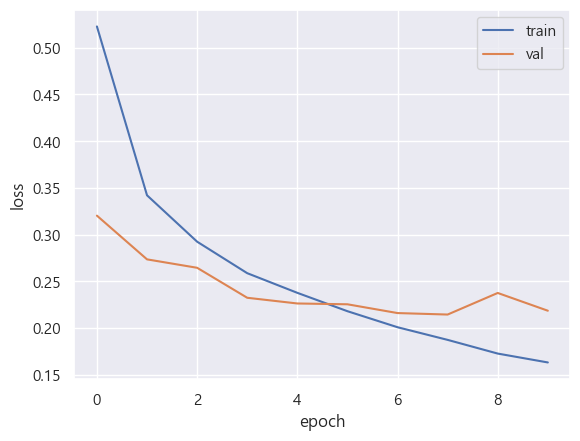

In [81]:
# 정확도 확인
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [82]:
# 모델 검증 정확도
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2144 - accuracy: 0.9222


[0.21436567604541779, 0.922249972820282]

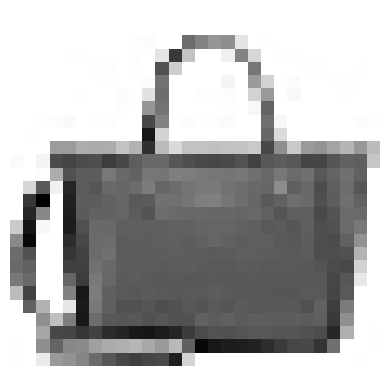

In [83]:
# val_scaled[0]
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.axis('off')
plt.show()

In [84]:
model.predict(val_scaled[0:1]).round(3)

1/1 [==============================] - 0s 53ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

#### 예측시각화

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [86]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [87]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [88]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 1s 2ms/step


In [89]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]

    #plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {pred_label}', fontsize=12, color='red', fontweight='bold')

    plt.axis('off')
    plt.show()

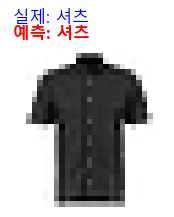

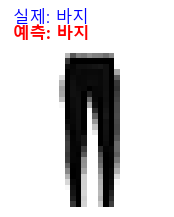

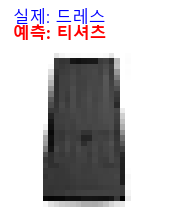

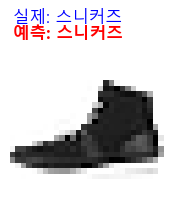

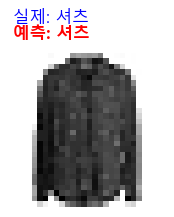

In [90]:
for i in range(40,45):
    show_image(i)

In [91]:
## 테스트세트로 검증
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2378 - accuracy: 0.9188


[0.23781150579452515, 0.9187999963760376]

#### 저장한 모델 로드

In [92]:
model2 = keras.models.load_model('./best-cnn-model.h5')

In [93]:
model2.layers

In [95]:
model2.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_CNN (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 Secound_CNN (Conv2D)        (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 Flatten (Flatten)           (None, 3136)              0         
                                                                 
 Hidden (Dense)              (None, 100)               313700 

In [94]:
# 모델 입력값 확인
model2.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'First_CNN_input')>

In [96]:
model2.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'First_CNN')>

#### 특성맵 시각화

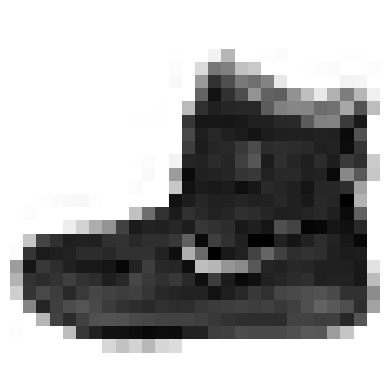

In [97]:
plt.imshow(train_input[0], cmap='gray_r')
plt.axis('off')
plt.show()

In [98]:
# 전체 모델에서 첫번째 합성곱레이어만 떼서 모델로 생성
model2_first_layer = keras.Model(model2.input, model2.layers[0].output)

In [99]:
model2_first_layer.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_CNN_input (InputLaye  [(None, 28, 28, 1)]       0         
 r)                                                              
                                                                 
 First_CNN (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
# 훈련세트 1번째 앵클부츠로 특성맵 생성
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feture_maps = model2_first_layer.predict(inputs)

1/1 [==============================] - 0s 33ms/step


In [101]:
feture_maps.shape

(1, 28, 28, 32)

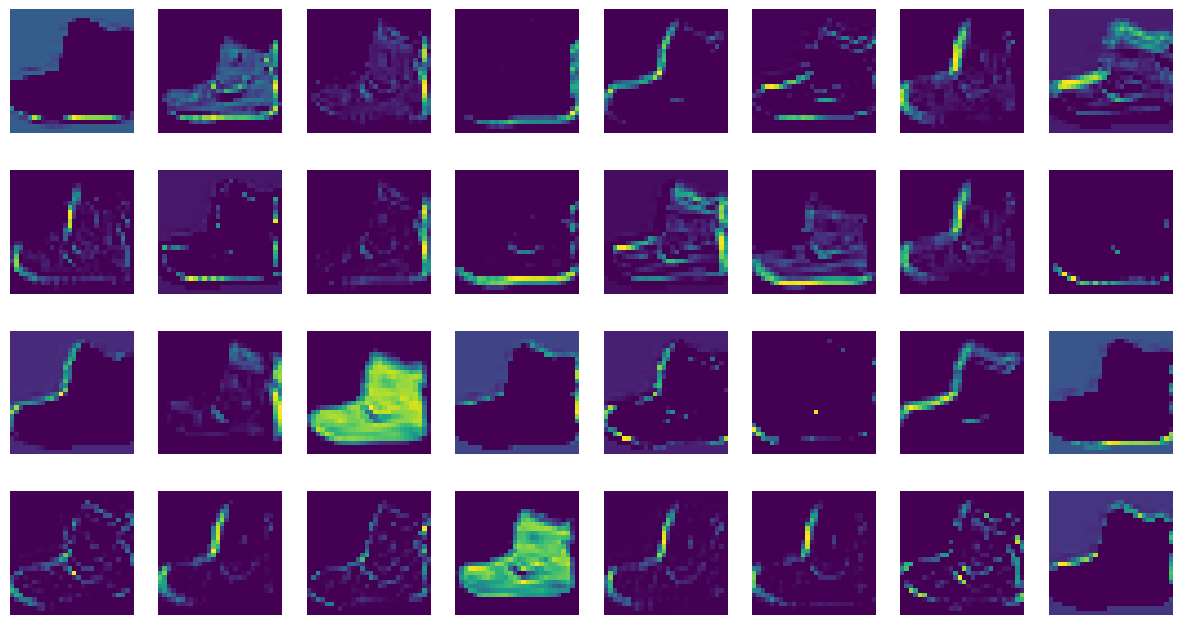

In [102]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feture_maps[0,:,:, i*8 + j], cmap='viridis')
        axs[i, j].axis('off')

plt.show()

- 위는 첫번쨰 합성곱을 통과한 앵클부츠의 결과화면

#### 결론
- 일반신경망이나 심층신경망으로 훈련했을 때 보다 정확도가 높아짐
- 심층신경망 : 대략 88%
- `합성곱신경망` : 대략 92%

##### 머신러닝/딥러닝 프레임워크 종류
- 사이킷 런 : 머신러닝에 특화된 프레임워크
    - 몇몇 기능은 다른 프레임워크에 없어서 같이 사용중
- 텐서플로/케라스 : 구글 개발 머신러닝 프레임워크
- `파이토치` : 페이스북(메타) 개발 머신러닝 프레임워크
- fastai : 파이토치 기반으로 된 딥러닝 프레임워크
- JAX : 구글 개발 최첨단 연구용 딥러닝 프레임워크
- MXNet : 아마존 개발
